In [1]:
#!pip install --user uproot tqdm

In [2]:
username = "akapoor"

In [3]:
import getpass
import os
if os.system('klist | grep Default | grep ' + username + '@CERN.CH'):
    os.system('echo %s' % getpass.getpass() + " | kinit " + username)

In [4]:
root_files = '/eos/user/a/akapoor/SWAN_projects/electron_ntupleL.root'

In [5]:
import uproot
import glob
import pandas as pd
from tqdm import tqdm

f = uproot.open(root_files)
f.allkeys()

[b'ntuplizer;1', b'ntuplizer/tree;1']

In [6]:
unneccesary_columns = ['ele_index',
       'Spring16GPV1Vals', 'Spring16GPV1RawVals', 'Spring16HZZV1Vals',
       'Spring16HZZV1RawVals', 'Fall17NoIsoV2Vals',
       'Fall17IsoV2Vals', 'Fall17IsoV1Vals',
       'Fall17NoIsoV1Vals', 'Spring16GPV1wp80', 'Spring16GPV1wp90',
       'Spring16HZZV1wpLoose', 'Fall17noIsoV2wp80',
       'Fall17noIsoV2wp90', 'Fall17isoV2wpHZZ', 'Fall17isoV2wp80',
       'Fall17isoV2wp90', 'Fall17noIsoV1wp90',
       'Fall17noIsoV1wp80', 'Fall17noIsoV1wpLoose', 'Fall17isoV1wp90',
       'Fall17isoV1wp80', 'nEvent', 'nRun', 'nLumi']

def get_df(root_file_name):
    f = uproot.open(root_file_name)
    if len(f.allkeys()) == 0:
        return pd.DataFrame()
    df = uproot.open(root_file_name)["ntuplizer/tree"].pandas.df()
    return df.drop(unneccesary_columns, axis=1)

In [7]:
df = get_df(root_files)

In [8]:
df.columns

Index(['genNpu', 'vtxN', 'ele_q', 'ele_3q', 'ele_IsMvaIsolated',
       'ele_IsMvaNonIsolated', 'matchedToGenEle', 'rho', 'ele_pt',
       'ele_oldsigmaietaieta', 'ele_oldsigmaiphiiphi', 'ele_oldcircularity',
       'ele_oldr9', 'ele_scletawidth', 'ele_sclphiwidth', 'ele_hadronicOverEm',
       'ele_oldhe', 'ele_kfhits', 'ele_kfchi2', 'ele_gsfchi2', 'ele_fbrem',
       'ele_gsfhits', 'ele_expected_inner_hits',
       'ele_conversionVertexFitProbability', 'ele_ep', 'ele_eelepout',
       'ele_IoEmIop', 'ele_deltaetain', 'ele_deltaphiin', 'ele_deltaetaseed',
       'ele_psEoverEraw', 'ele_pfPhotonIso', 'ele_pfChargedHadIso',
       'ele_pfNeutralHadIso', 'scl_E', 'scl_Et', 'scl_eta', 'scl_phi',
       'ele_sclRawE', 'ele_sclNclus', 'ele_olde15', 'ele_olde25max',
       'ele_olde55', 'ele_ecalE', 'ele_ecalErr', 'ele_trackErr', 'ele_combErr',
       'ele_PFcombErr', 'ele_pfSumPUIso', 'ele_SCfbrem', 'ele_eClass',
       'ele_nbrem', 'ele_oldhebc', 'ele_hebc', 'ele_convDist', 'ele_convDcot',

In [9]:
import numpy as np

df = df.query("matchedToGenEle != 2")
df.loc[df["matchedToGenEle"] != 1, "matchedToGenEle"] = 0

df = df.query("abs(scl_eta) < 2.5")
df = df.query("ele_pt >= 5")

df_barrel = df.query("abs(scl_eta) < 1.48")
df_endcap = df.query("abs(scl_eta) > 1.57")

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

def get_label(name):
    if name == 0:
        return "background"
    else:
        return "signal"
def plot_electrons(df, column, bins, logscale=False, ax=None, title=None, linestyle='-',alpha=1.0):
    if ax is None:
        ax = plt.gca()
    for name, group in df.groupby("matchedToGenEle"):
        group[column].plot.hist(bins=bins, histtype='step', alpha=alpha, label=get_label(name), ax=ax,
                                density=False, linestyle=linestyle, weights = np.ones_like(group[column]) / len(group[column]))
        ax.set_ylabel("Events")
    ax.set_xlabel(column)
    ax.legend()
    ax.set_title(title)
    #if logscale:
    ax.set_yscale("log", nonposy='clip')

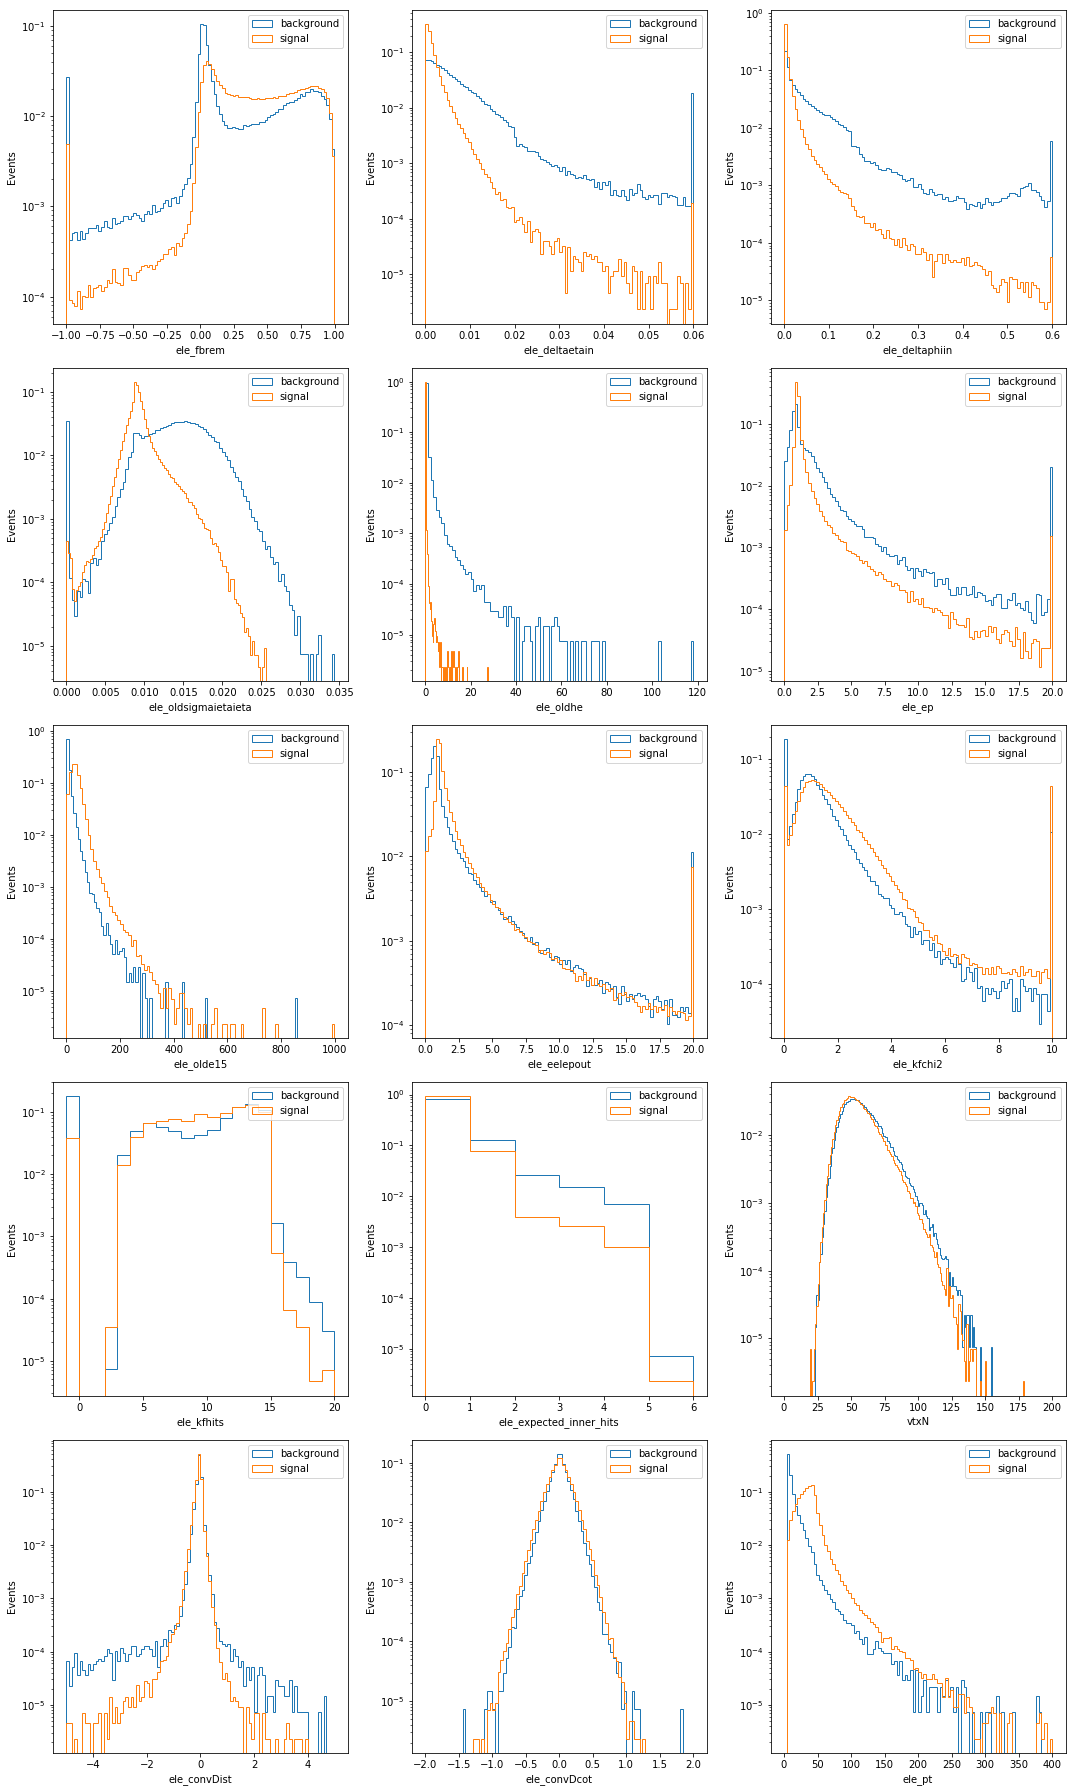

In [11]:
fig, axes = plt.subplots(5, 3, figsize=(15, 25))


#plot_electrons(df_barrel, "ele_fbrem", np.linspace(0, 100, 200), ax=axes[0,0])

plot_electrons(df_barrel, "ele_fbrem", 100, ax=axes[0,0])
plot_electrons(df_barrel, "ele_deltaetain", 100, ax=axes[0,1])
plot_electrons(df_barrel, "ele_deltaphiin", 100, ax=axes[0,2])

plot_electrons(df_barrel, "ele_oldsigmaietaieta", 100, ax=axes[1,0])
plot_electrons(df_barrel, "ele_oldhe", 100, ax=axes[1,1])
plot_electrons(df_barrel, "ele_ep", 100, ax=axes[1,2])

plot_electrons(df_barrel, "ele_olde15", 100, ax=axes[2,0])
plot_electrons(df_barrel, "ele_eelepout", 100, ax=axes[2,1])
plot_electrons(df_barrel, "ele_kfchi2", 100, ax=axes[2,2])

plot_electrons(df_barrel, "ele_kfhits", np.linspace(-1, 20, 22), ax=axes[3,0])
plot_electrons(df_barrel, "ele_expected_inner_hits",np.linspace(0, 6, 7) , ax=axes[3,1])
plot_electrons(df_barrel, "vtxN", np.linspace(0, 200, 201), ax=axes[3,2])

plot_electrons(df_barrel, "ele_convDist", np.linspace(-5, 5, 101), ax=axes[4,0])
plot_electrons(df_barrel, "ele_convDcot", np.linspace(-2, 2, 101), ax=axes[4,1])
plot_electrons(df_barrel, "ele_pt", np.linspace(0, 400, 101), ax=axes[4,2])


fig.tight_layout()
plt.show()

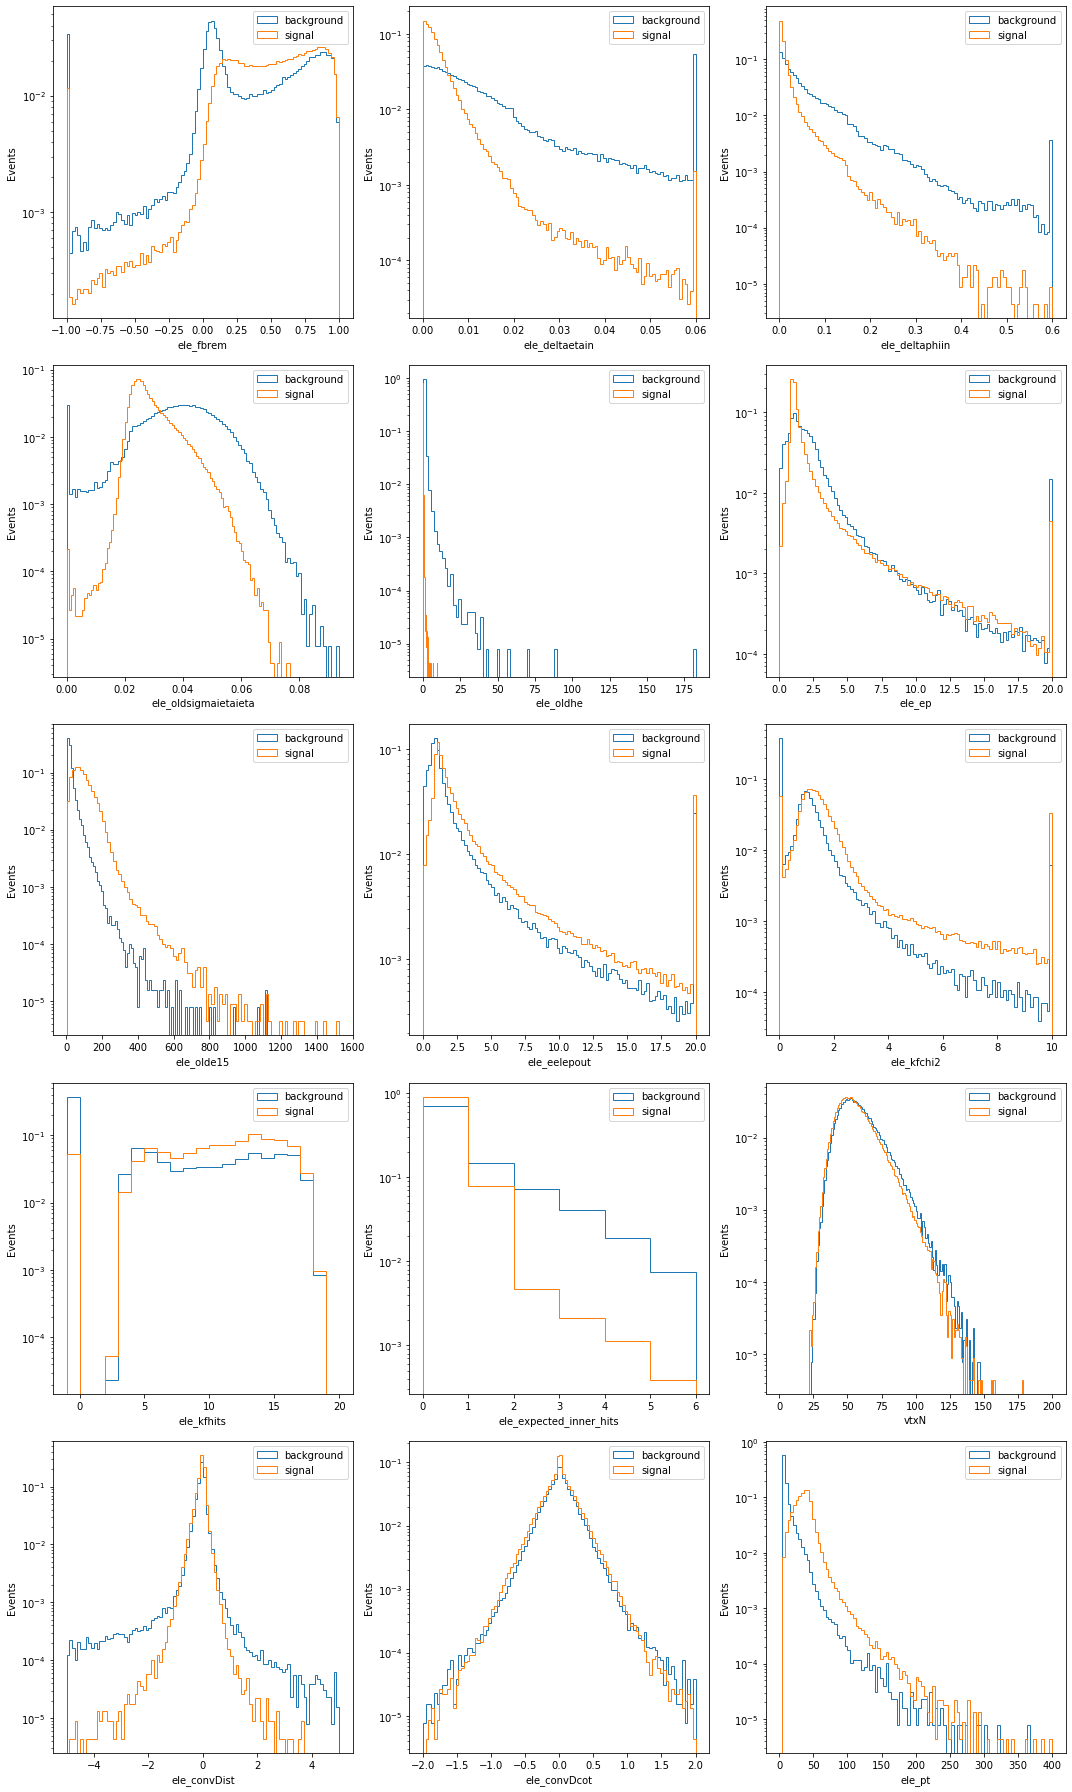

In [12]:
fig, axes = plt.subplots(5, 3, figsize=(15, 25))
#plot_electrons(df_endcap, "ele_pt", np.linspace(0, 100, 200), ax=axes[0,0])
#plot_electrons(df_endcap, "scl_eta", np.linspace(-2.5, 2.5, 50), ax=axes[0,1])
#plot_electrons(df_endcap, "ele_IsMvaNonIsolated", np.linspace(-1, 1, 100), ax=axes[0,2])
#plot_electrons(df_endcap, "ele_convDist", np.linspace(-1, 1, 100), ax=axes[1,0])
#plot_electrons(df_endcap, "ele_convDcot", np.linspace(-1, 1, 100), ax=axes[1,1])
#plot_electrons(df_endcap, "ele_IsMvaIsolated", np.linspace(-1, 1, 100), ax=axes[1,2])


#plot_electrons(df_endcap, "ele_fbrem", np.linspace(0, 100, 200), ax=axes[0,0])

plot_electrons(df_endcap, "ele_fbrem", 100, ax=axes[0,0])
plot_electrons(df_endcap, "ele_deltaetain", 100, ax=axes[0,1])
plot_electrons(df_endcap, "ele_deltaphiin", 100, ax=axes[0,2])

plot_electrons(df_endcap, "ele_oldsigmaietaieta", 100, ax=axes[1,0])
plot_electrons(df_endcap, "ele_oldhe", 100, ax=axes[1,1])
plot_electrons(df_endcap, "ele_ep", 100, ax=axes[1,2])

plot_electrons(df_endcap, "ele_olde15", 100, ax=axes[2,0])
plot_electrons(df_endcap, "ele_eelepout", 100, ax=axes[2,1])
plot_electrons(df_endcap, "ele_kfchi2", 100, ax=axes[2,2])

plot_electrons(df_endcap, "ele_kfhits", np.linspace(-1, 20, 22), ax=axes[3,0])
plot_electrons(df_endcap, "ele_expected_inner_hits",np.linspace(0, 6, 7) , ax=axes[3,1])
plot_electrons(df_endcap, "vtxN", np.linspace(0, 200, 201), ax=axes[3,2])

plot_electrons(df_endcap, "ele_convDist", np.linspace(-5, 5, 101), ax=axes[4,0])
plot_electrons(df_endcap, "ele_convDcot", np.linspace(-2, 2, 101), ax=axes[4,1])
plot_electrons(df_endcap, "ele_pt", np.linspace(0, 400, 101), ax=axes[4,2])

fig.tight_layout()
plt.show()

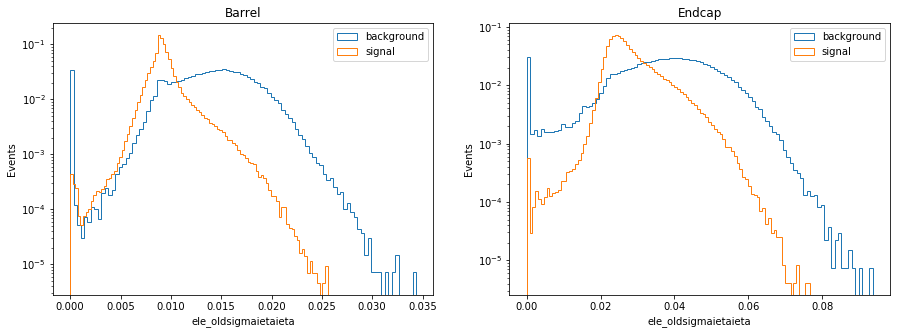

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_electrons(df.query("ele_isEB"), "ele_oldsigmaietaieta", 100, ax=axes[0], title="Barrel")
plot_electrons(df.query("ele_isEE"), "ele_oldsigmaietaieta", 100, ax=axes[1], title="Endcap")
plt.show()

In [31]:
#Cleaning electrons
df['ele_fbrem']=df['ele_fbrem'].astype(float)
df['ele_convDist']=df['ele_convDist'].astype(float)
df['ele_convDcot']=df['ele_convDcot'].astype(float)
df = df.query("ele_fbrem >= (-1.0)")
df = df.query("ele_convDist >= (-2000)")
df = df.query("ele_convDcot >= (-2000)")
df = df.query("ele_kfhits >= 0")
df = df.query("ele_kfchi2 >= 0")

#Selecting features
features_barrel = ["ele_fbrem", "ele_deltaetain", "ele_deltaphiin", "ele_oldsigmaietaieta", 
                   "ele_oldhe", "ele_ep", "ele_olde15", "ele_eelepout",
                   "ele_kfchi2", "ele_kfhits", "ele_expected_inner_hits", 
                   "vtxN", "ele_convDist","ele_convDcot", "ele_pt"]
#Currently same features for endcap and barrel
features_endcap = features_barrel

from sklearn.model_selection import train_test_split
import xgboost as xgb
import xgboost2tmva

#hyperparameters for xgboost
n_boost_rounds = 6
xgboost_params = {'eval_metric':'auc',
                  #'max_depth' : 4,
                  'objective'  :'binary:logitraw'}

category_titles = ["EB1_5", "EB2_5", "EE_5", "EB1_10", "EB2_10", "EE_10"]

In [32]:
from os import environ
os.environ['KERAS_BACKEND'] = 'tensorflow'

import tensorflow as tf
tf.random.set_random_seed(1)

from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
from tensorflow.compat.v2.keras.utils import multi_gpu_model
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from root_numpy import root2array, tree2array
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
import argparse
import sys
from numpy import ndarray

train_history = [None] * 6
modelDNN = [None] * 6

for i, group_df in df.groupby("EleMVACats"):
    
    # As said before, let's skip the low-pt trainings
    #if i !=5:
        #continue

    # get the category name
    category = category_titles[i]
    
    # get the features (either for endcap or barrel)
    features = features_endcap if "EE" in category else features_barrel
    
    # get the features and the target from the data frame
    X = group_df[features]
    y = group_df["matchedToGenEle"]
    
    possum = np.sum(group_df['matchedToGenEle'] == 1)
    negsum = np.sum(group_df['matchedToGenEle'] != 1)
    print(f'possum={possum}')
    print(f'negsum={negsum}')
    group_df["Sweight"]=1
    
    if possum<negsum:
        print(f'poswt={negsum / possum}')
        group_df.loc[group_df["matchedToGenEle"] == 1, "Sweight"] = negsum / possum
    else:
        print(f'negwt={possum / negsum}')
        group_df.loc[group_df["matchedToGenEle"] != 1, "Sweight"] = possum / negsum
    
    Wt = group_df["Sweight"]
    # split X and y up in train and test samples
    X_train, X_test, y_train, y_test, Wt_train, Wt_test= train_test_split(X, y, Wt, test_size=0.33, random_state=42)
    
    # Fortunately we are dealing with pandas DataFrames here, so we can just get the indices correspondng to the testing and training samples.
    # This will come in handy when we want to figure out which rows in the original dataframe where used for trainingand testing.
    idx_train = X_train.index
    idx_test = X_test.index

    # XGBoost has it's own data format, so we have to create these structures.
    # The copies have no specific purpose other than silencing an xgboost warning.
    dmatrix_train = xgb.DMatrix(X_train.copy(), label=np.copy(y_train))
    dmatrix_test  = xgb.DMatrix(X_test.copy(), label=np.copy(y_test ))

    # Get the number of positive and nevative training examples in this category

    print(category + ":")
    print("training on {0} signal and {1} background electrons".format(possum, negsum))

    # There is one additional hyperparameter that we have to set per catoegy: `scale_pos_weight`.
    # It corresponds  to a weight given to every positive sample, and it usually set to
    # n_neg / n_pos when you have imbalanced datasets to balance the total contributions
    # of the positive and negative classes in the loss function
    xgboost_params["scale_pos_weight"] = 1. * negsum / possum

    # In this line, we actually train the model.
    # Notice the `early_stopping_rounds`, which cause the boosting to automatically stop
    # when the test AUC has not decreased for 10 rounds. How does xgboost know what the training set is?
    # You pass it some dmatrices with labels as a list of tuples to the `evals` keyword argument.
    # The last entry in this list will be used for the early stopping criterion, in our case `dmatrix_test`.
    modelxgb = xgb.train(xgboost_params,
                      dmatrix_train,
                      num_boost_round=n_boost_rounds,
                      evals= [(dmatrix_train, 'train'),
                              (dmatrix_test, 'test')],
                      early_stopping_rounds=10,
                      verbose_eval=False)
    
    # We want to know if and when the training was early stopped.
    # `best_iteration` counts the first iteration as zero, so we increment by one.
    best_iteration = modelxgb.best_iteration + 1
    if best_iteration < n_boost_rounds:
        print("early stopping after {0} boosting rounds".format(best_iteration))
    print("")
    
    # Just in case we want to later implement the BDTs in CMSSW, we use the xgboost2tmva script
    # to save the model as a TMVA compatible XML file.
    # Note that the XML will not be pretty, as everything is printed in one line.
    # You can use the commandline tool `xmllint` with the `--format` option if you want to make it pretty.
    xgboost2tmva.convert_model(modelxgb.get_dump(),
                               input_variables=[(f,'F') for f in features],
                               output_xml='electron_id_{0}.xml'.format(i))
    
    # If we want to load the model again with the xgboost library, we can't use the XML file.
    # Hence, we also save the model in xgboosts own binary format just to be sure.
    modelxgb.save_model("electron_id_{0}.bin".format(i))
    
    df.loc[idx_train, "score"] = modelxgb.predict(dmatrix_train)
    df.loc[idx_test, "score"] = modelxgb.predict(dmatrix_test)
    #########################
    
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform (X_test)

    #y_train= to_categorical(y_trainN, num_classes=2)
    #y_test= to_categorical(y_testN, num_classes=2)

    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    Wt_train = np.asarray(Wt_train)


    X_test = np.asarray(X_test)
    y_test = np.asarray(y_test)
    Wt_test = np.asarray(Wt_test)


    #tensorboard_callback = TensorBoard(log_dir=f'LOGGY2/logdir_BS{BS}_EP{EP}_LR{LR}_LV{LV}_NN{NN}_GPU{GPU}_withAdj_v1')
    #tf.compat.v1.disable_eager_execution()
    #print("[INFO] training with {} GPUs...".format(GPU))

    Xdata=[X_train,X_test]
    ydata=[y_train,y_test]
    Wtdata=[Wt_train, Wt_test]
    
    # Get the number of positive and nevative training examples in this category

    print(category + ":")
    print("training DNN on {0} signal and {1} background electrons".format(possum, negsum))
    
    #modelDNN = Sequential()
    #modelDNN.add(Dense(32, kernel_initializer='glorot_normal', activation='relu', input_dim=14))
    #modelDNN.add(Dropout(0.1))
    #modelDNN.add(Dense(16, kernel_initializer='glorot_normal', activation='relu'))
    #modelDNN.add(Dropout(0.1))
    #modelDNN.add(Dense(8, kernel_initializer='glorot_normal', activation='relu'))
    #modelDNN.add(Dropout(0.1))
    #modelDNN.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    
    #modelDNN = Sequential()
    #modelDNN.add(Dense(28, kernel_initializer='glorot_normal', activation='relu', input_dim=14))
    #modelDNN.add(Dropout(0.1))
    #modelDNN.add(Dense(28, kernel_initializer='glorot_normal', activation='relu'))
    #modelDNN.add(Dropout(0.1))
    #modelDNN.add(Dense(28, kernel_initializer='glorot_normal', activation='relu'))
    #modelDNN.add(Dropout(0.2))
    #modelDNN.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    
    modelDNN[i] = Sequential()
    modelDNN[i].add(Dense(15, kernel_initializer='glorot_normal', activation='relu', input_dim=15))
    #modelDNN.add(Dropout(0.1))
    #modelDNN.add(Dense(56, kernel_initializer='glorot_normal', activation='relu'))
    #modelDNN.add(Dropout(0.1))
    modelDNN[i].add(Dense(28, kernel_initializer='glorot_normal', activation='relu'))
    modelDNN[i].add(Dropout(0.05))
    #modelDNN[i].add(Dense(56, kernel_initializer='glorot_normal', activation='relu'))
    #modelDNN[i].add(Dropout(0.05))
    modelDNN[i].add(Dense(28, kernel_initializer='glorot_normal', activation='relu'))
    modelDNN[i].add(Dropout(0.05))
    modelDNN[i].add(Dense(15, kernel_initializer='glorot_normal', activation='relu'))
    modelDNN[i].add(Dropout(0.1))
    modelDNN[i].add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    
    modelDNN[i].compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy',])
    modelDNN[i].summary()
    
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    train_history[i] = modelDNN[i].fit(Xdata[0],ydata[0],
                                    epochs=200,batch_size=128,validation_data=(Xdata[1],ydata[1], Wtdata[1]),
                                    verbose=1,callbacks=[es], sample_weight=Wtdata[0])
        
    
    #y_pred_test = modelDNN[i].predict(X_test)
    #y_pred_train = modelDNN[i].predict(X_train)
    #########################

    # Now we see why it's good to have the indices corresponding to the train and test set!
    # We can now calculate classification scores with our freshly-trained model and store them
    # in a new column `score` of the original DataFrame at the appropriate places.
    
    df.loc[idx_train, "scoreDNN"] = modelDNN[i].predict(X_train)
    df.loc[idx_test, "scoreDNN"] = modelDNN[i].predict(X_test)
    
    # When we look at how the model performs later, we are mostly interested in the performance on the
    # test set. We can add another boolean column to indicate whether an electron is in the test set or not.
    df.loc[idx_train, "test"] = False
    df.loc[idx_test, "test"] = True

possum=6065
negsum=37363


/usr/local/bin/start_ipykernel.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


poswt=6.16042868920033
EB1_5:
training on 6065 signal and 37363 background electrons

EB1_5:
training DNN on 6065 signal and 37363 background electrons
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_37 (Dense)             (None, 28)                448       
_________________________________________________________________
dropout_21 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 28)                812       
_________________________________________________________________
dropout_22 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_39 (Dense)             (None

Epoch 48/200
29096/29096 [==============================] - 1s 23us/sample - loss: 0.7250 - acc: 0.8008 - val_loss: 0.7282 - val_acc: 0.7976
Epoch 49/200
29096/29096 [==============================] - 1s 22us/sample - loss: 0.7218 - acc: 0.8024 - val_loss: 0.7282 - val_acc: 0.7977
Epoch 50/200
29096/29096 [==============================] - 1s 21us/sample - loss: 0.7249 - acc: 0.8011 - val_loss: 0.7269 - val_acc: 0.7975
Epoch 51/200
29096/29096 [==============================] - 1s 22us/sample - loss: 0.7176 - acc: 0.8050 - val_loss: 0.7260 - val_acc: 0.7980
Epoch 52/200
29096/29096 [==============================] - 1s 21us/sample - loss: 0.7181 - acc: 0.8038 - val_loss: 0.7251 - val_acc: 0.8007
Epoch 53/200
29096/29096 [==============================] - 1s 23us/sample - loss: 0.7195 - acc: 0.8021 - val_loss: 0.7240 - val_acc: 0.8003
Epoch 54/200
29096/29096 [==============================] - 1s 23us/sample - loss: 0.7186 - acc: 0.8029 - val_loss: 0.7231 - val_acc: 0.8012
Epoch 55/200


29096/29096 [==============================] - 1s 26us/sample - loss: 0.6650 - acc: 0.8192 - val_loss: 0.6890 - val_acc: 0.8083
Epoch 107/200
29096/29096 [==============================] - 1s 24us/sample - loss: 0.6656 - acc: 0.8175 - val_loss: 0.6879 - val_acc: 0.8085
Epoch 108/200
29096/29096 [==============================] - 1s 23us/sample - loss: 0.6637 - acc: 0.8210 - val_loss: 0.6878 - val_acc: 0.8112
Epoch 109/200
29096/29096 [==============================] - 1s 26us/sample - loss: 0.6636 - acc: 0.8194 - val_loss: 0.6868 - val_acc: 0.8085
Epoch 110/200
29096/29096 [==============================] - 1s 29us/sample - loss: 0.6645 - acc: 0.8174 - val_loss: 0.6871 - val_acc: 0.8111
Epoch 111/200
29096/29096 [==============================] - 1s 25us/sample - loss: 0.6632 - acc: 0.8185 - val_loss: 0.6859 - val_acc: 0.8076
Epoch 112/200
29096/29096 [==============================] - 1s 24us/sample - loss: 0.6611 - acc: 0.8190 - val_loss: 0.6858 - val_acc: 0.8097
Epoch 113/200
29096/

Epoch 164/200
29096/29096 [==============================] - 1s 21us/sample - loss: 0.6255 - acc: 0.8287 - val_loss: 0.6643 - val_acc: 0.8207
Epoch 165/200
29096/29096 [==============================] - 1s 21us/sample - loss: 0.6241 - acc: 0.8298 - val_loss: 0.6645 - val_acc: 0.8210
Epoch 166/200
29096/29096 [==============================] - 1s 21us/sample - loss: 0.6301 - acc: 0.8297 - val_loss: 0.6622 - val_acc: 0.8136
Epoch 167/200
29096/29096 [==============================] - 1s 23us/sample - loss: 0.6287 - acc: 0.8278 - val_loss: 0.6625 - val_acc: 0.8185
Epoch 168/200
29096/29096 [==============================] - 1s 24us/sample - loss: 0.6243 - acc: 0.8316 - val_loss: 0.6633 - val_acc: 0.8144
Epoch 169/200
29096/29096 [==============================] - 1s 28us/sample - loss: 0.6222 - acc: 0.8296 - val_loss: 0.6640 - val_acc: 0.8206
Epoch 170/200
29096/29096 [==============================] - 1s 29us/sample - loss: 0.6260 - acc: 0.8297 - val_loss: 0.6621 - val_acc: 0.8202
Epoch 

/usr/local/bin/start_ipykernel.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


poswt=6.877321715202935
EB2_5:
training on 4361 signal and 29992 background electrons

EB2_5:
training DNN on 4361 signal and 29992 background electrons
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_42 (Dense)             (None, 28)                448       
_________________________________________________________________
dropout_24 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 28)                812       
_________________________________________________________________
dropout_25 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_44 (Dense)             (Non

Epoch 48/200
23016/23016 [==============================] - 1s 23us/sample - loss: 0.7803 - acc: 0.8094 - val_loss: 0.8295 - val_acc: 0.8022
Epoch 49/200
23016/23016 [==============================] - 1s 22us/sample - loss: 0.7764 - acc: 0.8114 - val_loss: 0.8293 - val_acc: 0.8013
Epoch 50/200
23016/23016 [==============================] - 1s 23us/sample - loss: 0.7794 - acc: 0.8099 - val_loss: 0.8301 - val_acc: 0.8057
Epoch 51/200
23016/23016 [==============================] - 1s 25us/sample - loss: 0.7747 - acc: 0.8114 - val_loss: 0.8296 - val_acc: 0.8069
Epoch 52/200
23016/23016 [==============================] - 1s 23us/sample - loss: 0.7737 - acc: 0.8119 - val_loss: 0.8299 - val_acc: 0.8089
Epoch 53/200
23016/23016 [==============================] - 1s 24us/sample - loss: 0.7680 - acc: 0.8156 - val_loss: 0.8289 - val_acc: 0.8059
Epoch 54/200
23016/23016 [==============================] - 1s 23us/sample - loss: 0.7759 - acc: 0.8113 - val_loss: 0.8275 - val_acc: 0.8030
Epoch 55/200


23016/23016 [==============================] - 1s 23us/sample - loss: 0.7433 - acc: 0.8195 - val_loss: 0.8160 - val_acc: 0.8080
Epoch 107/200
23016/23016 [==============================] - 1s 24us/sample - loss: 0.7355 - acc: 0.8204 - val_loss: 0.8166 - val_acc: 0.8074
Epoch 108/200
23016/23016 [==============================] - 1s 23us/sample - loss: 0.7395 - acc: 0.8165 - val_loss: 0.8175 - val_acc: 0.8121
Epoch 109/200
23016/23016 [==============================] - 1s 26us/sample - loss: 0.7401 - acc: 0.8210 - val_loss: 0.8164 - val_acc: 0.8096
Epoch 110/200
23016/23016 [==============================] - 1s 24us/sample - loss: 0.7394 - acc: 0.8163 - val_loss: 0.8146 - val_acc: 0.8084
Epoch 111/200
23016/23016 [==============================] - 1s 24us/sample - loss: 0.7350 - acc: 0.8188 - val_loss: 0.8176 - val_acc: 0.8128
Epoch 112/200
23016/23016 [==============================] - 1s 26us/sample - loss: 0.7359 - acc: 0.8191 - val_loss: 0.8153 - val_acc: 0.8060
Epoch 113/200
23016/

/usr/local/bin/start_ipykernel.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


poswt=12.759729272419628
EE_5:
training on 4137 signal and 52787 background electrons

EE_5:
training DNN on 4137 signal and 52787 background electrons
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_47 (Dense)             (None, 28)                448       
_________________________________________________________________
dropout_27 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 28)                812       
_________________________________________________________________
dropout_28 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_49 (Dense)             (None

Epoch 48/200
38139/38139 [==============================] - 1s 26us/sample - loss: 0.7891 - acc: 0.7929 - val_loss: 0.7663 - val_acc: 0.8002
Epoch 49/200
38139/38139 [==============================] - 1s 23us/sample - loss: 0.7865 - acc: 0.7924 - val_loss: 0.7649 - val_acc: 0.8070
Epoch 50/200
38139/38139 [==============================] - 1s 22us/sample - loss: 0.7885 - acc: 0.7944 - val_loss: 0.7640 - val_acc: 0.8035
Epoch 51/200
38139/38139 [==============================] - 1s 23us/sample - loss: 0.7830 - acc: 0.7945 - val_loss: 0.7635 - val_acc: 0.7979
Epoch 52/200
38139/38139 [==============================] - 1s 24us/sample - loss: 0.7841 - acc: 0.7926 - val_loss: 0.7627 - val_acc: 0.7937
Epoch 53/200
38139/38139 [==============================] - 1s 24us/sample - loss: 0.7824 - acc: 0.7900 - val_loss: 0.7612 - val_acc: 0.8044
Epoch 54/200
38139/38139 [==============================] - 1s 23us/sample - loss: 0.7766 - acc: 0.7951 - val_loss: 0.7607 - val_acc: 0.8017
Epoch 55/200


38139/38139 [==============================] - 1s 22us/sample - loss: 0.7421 - acc: 0.8030 - val_loss: 0.7415 - val_acc: 0.8025
Epoch 107/200
38139/38139 [==============================] - 1s 23us/sample - loss: 0.7398 - acc: 0.8020 - val_loss: 0.7413 - val_acc: 0.8020
Epoch 108/200
38139/38139 [==============================] - 1s 28us/sample - loss: 0.7389 - acc: 0.8008 - val_loss: 0.7418 - val_acc: 0.8074
Epoch 109/200
38139/38139 [==============================] - 1s 28us/sample - loss: 0.7431 - acc: 0.8013 - val_loss: 0.7412 - val_acc: 0.8006
Epoch 110/200
38139/38139 [==============================] - 1s 25us/sample - loss: 0.7399 - acc: 0.8025 - val_loss: 0.7413 - val_acc: 0.8050
Epoch 111/200
38139/38139 [==============================] - 1s 24us/sample - loss: 0.7371 - acc: 0.8028 - val_loss: 0.7407 - val_acc: 0.8058
Epoch 112/200
38139/38139 [==============================] - 1s 28us/sample - loss: 0.7371 - acc: 0.8003 - val_loss: 0.7408 - val_acc: 0.8029
Epoch 113/200
38139/

Epoch 164/200
38139/38139 [==============================] - 1s 24us/sample - loss: 0.7202 - acc: 0.8047 - val_loss: 0.7343 - val_acc: 0.8059
Epoch 165/200
38139/38139 [==============================] - 1s 25us/sample - loss: 0.7111 - acc: 0.8075 - val_loss: 0.7349 - val_acc: 0.8084
Epoch 166/200
38139/38139 [==============================] - 1s 28us/sample - loss: 0.7198 - acc: 0.8044 - val_loss: 0.7348 - val_acc: 0.8048
Epoch 167/200
38139/38139 [==============================] - 1s 27us/sample - loss: 0.7133 - acc: 0.8036 - val_loss: 0.7369 - val_acc: 0.8143
Epoch 168/200
38139/38139 [==============================] - 1s 23us/sample - loss: 0.7125 - acc: 0.8080 - val_loss: 0.7352 - val_acc: 0.8091
Epoch 169/200
38139/38139 [==============================] - 1s 24us/sample - loss: 0.7134 - acc: 0.8058 - val_loss: 0.7353 - val_acc: 0.8108
Epoch 170/200
38139/38139 [==============================] - 1s 28us/sample - loss: 0.7072 - acc: 0.8063 - val_loss: 0.7364 - val_acc: 0.8143
Epoch 

/usr/local/bin/start_ipykernel.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


EB1_10:
training on 227880 signal and 22230 background electrons

EB1_10:
training DNN on 227880 signal and 22230 background electrons
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_52 (Dense)             (None, 28)                448       
_________________________________________________________________
dropout_30 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 28)                812       
_________________________________________________________________
dropout_31 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 15)            

167573/167573 [==============================] - 4s 24us/sample - loss: 0.3206 - acc: 0.9314 - val_loss: 0.3092 - val_acc: 0.9333
Epoch 48/200
167573/167573 [==============================] - 4s 24us/sample - loss: 0.3220 - acc: 0.9303 - val_loss: 0.3081 - val_acc: 0.9345
Epoch 49/200
167573/167573 [==============================] - 4s 23us/sample - loss: 0.3188 - acc: 0.9312 - val_loss: 0.3074 - val_acc: 0.9358
Epoch 50/200
167573/167573 [==============================] - 4s 23us/sample - loss: 0.3184 - acc: 0.9320 - val_loss: 0.3072 - val_acc: 0.9388
Epoch 51/200
167573/167573 [==============================] - 4s 24us/sample - loss: 0.3202 - acc: 0.9319 - val_loss: 0.3064 - val_acc: 0.9323
Epoch 52/200
167573/167573 [==============================] - 4s 26us/sample - loss: 0.3175 - acc: 0.9314 - val_loss: 0.3058 - val_acc: 0.9386
Epoch 53/200
167573/167573 [==============================] - 4s 24us/sample - loss: 0.3171 - acc: 0.9321 - val_loss: 0.3048 - val_acc: 0.9385
Epoch 54/200

167573/167573 [==============================] - 4s 21us/sample - loss: 0.2929 - acc: 0.9387 - val_loss: 0.2873 - val_acc: 0.9459
Epoch 105/200
167573/167573 [==============================] - 4s 22us/sample - loss: 0.2939 - acc: 0.9388 - val_loss: 0.2852 - val_acc: 0.9435
Epoch 106/200
167573/167573 [==============================] - 4s 22us/sample - loss: 0.2904 - acc: 0.9392 - val_loss: 0.2849 - val_acc: 0.9433
Epoch 107/200
167573/167573 [==============================] - 4s 23us/sample - loss: 0.2915 - acc: 0.9391 - val_loss: 0.2875 - val_acc: 0.9473
Epoch 108/200
167573/167573 [==============================] - 4s 22us/sample - loss: 0.2904 - acc: 0.9394 - val_loss: 0.2851 - val_acc: 0.9403
Epoch 109/200
167573/167573 [==============================] - 4s 23us/sample - loss: 0.2900 - acc: 0.9393 - val_loss: 0.2842 - val_acc: 0.9397
Epoch 110/200
167573/167573 [==============================] - 4s 24us/sample - loss: 0.2910 - acc: 0.9391 - val_loss: 0.2840 - val_acc: 0.9425
Epoch 

Epoch 161/200
167573/167573 [==============================] - 4s 23us/sample - loss: 0.2790 - acc: 0.9412 - val_loss: 0.2794 - val_acc: 0.9452
Epoch 162/200
167573/167573 [==============================] - 4s 23us/sample - loss: 0.2801 - acc: 0.9410 - val_loss: 0.2803 - val_acc: 0.9466
Epoch 163/200
167573/167573 [==============================] - 4s 22us/sample - loss: 0.2773 - acc: 0.9412 - val_loss: 0.2802 - val_acc: 0.9460
Epoch 164/200
167573/167573 [==============================] - 4s 22us/sample - loss: 0.2783 - acc: 0.9416 - val_loss: 0.2797 - val_acc: 0.9433
Epoch 165/200
167573/167573 [==============================] - 4s 22us/sample - loss: 0.2783 - acc: 0.9414 - val_loss: 0.2807 - val_acc: 0.9467
Epoch 166/200
167573/167573 [==============================] - 4s 23us/sample - loss: 0.2785 - acc: 0.9411 - val_loss: 0.2795 - val_acc: 0.9457
Epoch 167/200
167573/167573 [==============================] - 4s 24us/sample - loss: 0.2789 - acc: 0.9413 - val_loss: 0.2796 - val_acc:

/usr/local/bin/start_ipykernel.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


EB2_10:
training on 173195 signal and 19424 background electrons

EB2_10:
training DNN on 173195 signal and 19424 background electrons
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_57 (Dense)             (None, 28)                448       
_________________________________________________________________
dropout_33 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 28)                812       
_________________________________________________________________
dropout_34 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 15)           

129054/129054 [==============================] - 3s 25us/sample - loss: 0.3600 - acc: 0.9195 - val_loss: 0.3567 - val_acc: 0.9211
Epoch 48/200
129054/129054 [==============================] - 3s 24us/sample - loss: 0.3602 - acc: 0.9187 - val_loss: 0.3553 - val_acc: 0.9200
Epoch 49/200
129054/129054 [==============================] - 3s 24us/sample - loss: 0.3566 - acc: 0.9195 - val_loss: 0.3548 - val_acc: 0.9180
Epoch 50/200
129054/129054 [==============================] - 3s 23us/sample - loss: 0.3567 - acc: 0.9186 - val_loss: 0.3553 - val_acc: 0.9211
Epoch 51/200
129054/129054 [==============================] - 3s 23us/sample - loss: 0.3571 - acc: 0.9191 - val_loss: 0.3537 - val_acc: 0.9221
Epoch 52/200
129054/129054 [==============================] - 3s 25us/sample - loss: 0.3565 - acc: 0.9200 - val_loss: 0.3557 - val_acc: 0.9246
Epoch 53/200
129054/129054 [==============================] - 3s 25us/sample - loss: 0.3554 - acc: 0.9204 - val_loss: 0.3529 - val_acc: 0.9198
Epoch 54/200

129054/129054 [==============================] - 3s 23us/sample - loss: 0.3330 - acc: 0.9243 - val_loss: 0.3408 - val_acc: 0.9276
Epoch 105/200
129054/129054 [==============================] - 3s 21us/sample - loss: 0.3328 - acc: 0.9248 - val_loss: 0.3405 - val_acc: 0.9254
Epoch 106/200
129054/129054 [==============================] - 3s 24us/sample - loss: 0.3339 - acc: 0.9247 - val_loss: 0.3409 - val_acc: 0.9228
Epoch 107/200
129054/129054 [==============================] - 3s 25us/sample - loss: 0.3332 - acc: 0.9243 - val_loss: 0.3408 - val_acc: 0.9230
Epoch 108/200
129054/129054 [==============================] - 3s 25us/sample - loss: 0.3338 - acc: 0.9249 - val_loss: 0.3392 - val_acc: 0.9223
Epoch 109/200
129054/129054 [==============================] - 3s 24us/sample - loss: 0.3340 - acc: 0.9245 - val_loss: 0.3395 - val_acc: 0.9235
Epoch 110/200
129054/129054 [==============================] - 3s 27us/sample - loss: 0.3325 - acc: 0.9252 - val_loss: 0.3397 - val_acc: 0.9223
Epoch 

/usr/local/bin/start_ipykernel.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


negwt=7.843069711282361
EE_10:
training on 220853 signal and 28159 background electrons

EE_10:
training DNN on 220853 signal and 28159 background electrons
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_62 (Dense)             (None, 28)                448       
_________________________________________________________________
dropout_36 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 28)                812       
_________________________________________________________________
dropout_37 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_64 (Dense)            

166838/166838 [==============================] - 4s 25us/sample - loss: 0.4510 - acc: 0.8968 - val_loss: 0.4506 - val_acc: 0.8999
Epoch 48/200
166838/166838 [==============================] - 4s 24us/sample - loss: 0.4490 - acc: 0.8969 - val_loss: 0.4523 - val_acc: 0.9067
Epoch 49/200
166838/166838 [==============================] - 4s 25us/sample - loss: 0.4476 - acc: 0.8984 - val_loss: 0.4491 - val_acc: 0.8995
Epoch 50/200
166838/166838 [==============================] - 4s 25us/sample - loss: 0.4484 - acc: 0.8973 - val_loss: 0.4499 - val_acc: 0.9034
Epoch 51/200
166838/166838 [==============================] - 4s 24us/sample - loss: 0.4467 - acc: 0.8984 - val_loss: 0.4486 - val_acc: 0.9017
Epoch 52/200
166838/166838 [==============================] - 4s 23us/sample - loss: 0.4464 - acc: 0.8974 - val_loss: 0.4479 - val_acc: 0.9009
Epoch 53/200
166838/166838 [==============================] - 4s 24us/sample - loss: 0.4458 - acc: 0.8976 - val_loss: 0.4485 - val_acc: 0.9050
Epoch 54/200

166838/166838 [==============================] - 4s 25us/sample - loss: 0.4243 - acc: 0.9059 - val_loss: 0.4300 - val_acc: 0.9055
Epoch 105/200
166838/166838 [==============================] - 4s 23us/sample - loss: 0.4241 - acc: 0.9052 - val_loss: 0.4307 - val_acc: 0.9088
Epoch 106/200
166838/166838 [==============================] - 4s 22us/sample - loss: 0.4236 - acc: 0.9054 - val_loss: 0.4301 - val_acc: 0.9098
Epoch 107/200
166838/166838 [==============================] - 4s 24us/sample - loss: 0.4234 - acc: 0.9065 - val_loss: 0.4293 - val_acc: 0.9025
Epoch 108/200
166838/166838 [==============================] - 4s 27us/sample - loss: 0.4239 - acc: 0.9048 - val_loss: 0.4304 - val_acc: 0.9101
Epoch 109/200
166838/166838 [==============================] - 4s 24us/sample - loss: 0.4217 - acc: 0.9054 - val_loss: 0.4318 - val_acc: 0.9135
Epoch 110/200
166838/166838 [==============================] - 4s 24us/sample - loss: 0.4229 - acc: 0.9062 - val_loss: 0.4298 - val_acc: 0.9090
Epoch 

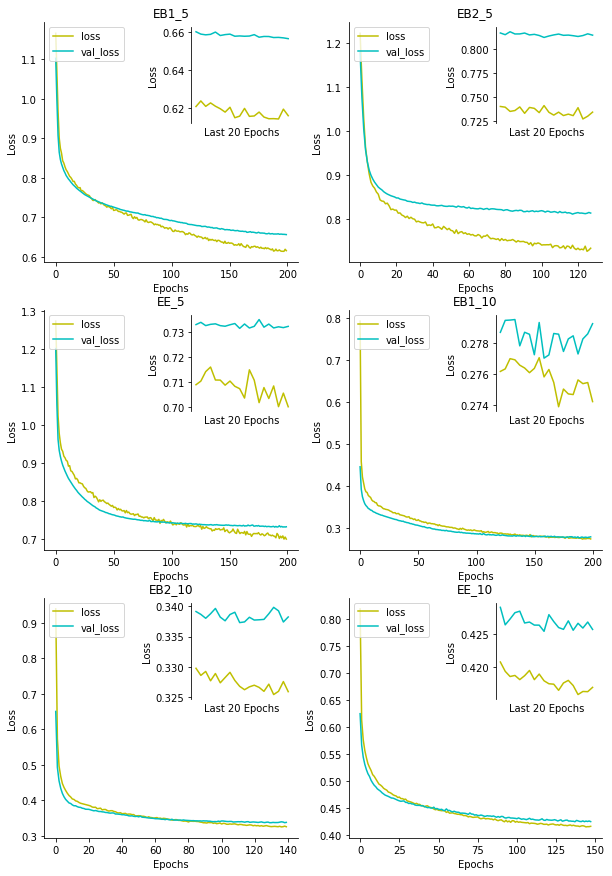

In [33]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes

fig2, axes2 = plt.subplots(3, 2, figsize=(10, 15))

for i, df_group in df.groupby("EleMVACats"):
    
    #if i !=5:
        #continue
        
    loss = train_history[i].history['loss']
    val_loss = train_history[i].history['val_loss']
    #print(loss)
    
    
        
    if i==0:
        ax = axes2[0,0]
        val = -0.1875
    elif i==1:
        ax = axes2[0,1]
        val = -0.1875
    elif i==2:
        ax = axes2[1,0]
        val = -0.1075
    elif i==3:
        ax = axes2[1,1]
        val = -0.1875
    elif i==4:
        ax = axes2[2,0]
        val = -0.1875
    elif i==5:
        ax = axes2[2,1]
        val = -0.1075
        
    ax.set_title(category_titles[i])    
    ax.plot(loss, color='y')
    ax.plot(val_loss, color='c')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    #meter that I can replace in the above code that will allow custom locations of the inset axes within the parent axes? I've tried to use the bbox_to_ancax1.set_yscale('log')
    #ax1.set_ylim(0.55, 0.8)
    ax.legend(['loss', 'val_loss'], loc=2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    loss_20 = loss[-20:]
    val_loss_20 = val_loss[-20:]
    
    inset_axes1 = inset_axes(ax,
                            width="40%", # width = 30% of parent_bbox
                            height="40%", # height : 1 inch
                            loc=1)

    inset_axes1.plot(loss_20, color='y')
    inset_axes1.plot(val_loss_20, color='c')
    inset_axes1.set_xlabel('Last 20 Epochs')
    inset_axes1.set_ylabel('Loss')
    inset_axes1.spines['top'].set_visible(False)
    inset_axes1.spines['right'].set_visible(False)
    inset_axes1.spines['bottom'].set_visible(False)
    inset_axes1.get_xaxis().set_ticks([])
        
fig2.savefig('loss_DY.pdf')  
#plt.grid()
plt.show()   

In [34]:
from sklearn import metrics

def plot_roc_curve(df, score_column, tpr_threshold=0, ax=None, color=None, linestyle='-', label=None):
    if ax is None:
        ax = plt.gca()
    ax.set_yscale("log", nonposy='clip')
    if label is None:
        label = score_column
    fpr, tpr, thresholds = metrics.roc_curve(df["matchedToGenEle"], df[score_column])
    mask = tpr > tpr_threshold
    fpr, tpr = fpr[mask], tpr[mask]
    auc=metrics.auc(fpr, tpr)
    label=label+' auc='+str(round(auc*100,1))+'%'
    #ax.legend()
    ax.plot(tpr, fpr, label=label, color=color, linestyle=linestyle)
    return auc

def plot_single_roc_point(df, var='Fall17isoV1wpLoose', ax=None , marker='o', markersize=6, color="red",label=''):
    
    backgroundpass=np.sum((df[var] == 1) & (df['matchedToGenEle'] == 0))
    backgroundrej=np.sum((df[var] == 0) & (df['matchedToGenEle'] == 0))
    signalpass=np.sum((df[var] == 1) & (df['matchedToGenEle'] == 1))
    signalrej=np.sum((df[var] == 0) & (df['matchedToGenEle'] == 1))
    backgroundrej=backgroundrej/(backgroundpass+backgroundrej)
    signaleff=signalpass/(signalpass+signalrej)
    #ax.legend()
    ax.plot([signaleff], [1-backgroundrej], marker=marker, markersize=markersize, color=color, label=label)
    #t= ax.annotate(label, (signaleff, 1-backgroundrej),rotation=90)
    #t.set_bbox(dict(facecolor='red', alpha=0.2, edgecolor='red'))
    #ax.annotate('(str(signaleff), str(1-backgroundrej))', (signaleff, 1-backgroundrej))
    #ax.plot((0,signaleff), (backgroundrej, backgroundrej), 'k--', alpha=0.3)
    #ax.plot((signaleff,signaleff), (0, backgroundrej), 'k--',alpha=0.3)
    #ax.plot((0,1), (1-backgroundrej, 1-backgroundrej), 'k--', alpha=0.3)
    #ax.plot((signaleff,signaleff), (0, 1), 'k--',alpha=0.3)
    
def plot_single_roc_point2(df, var='score', val='0', ax=None , marker='o', markersize=6, color="red",label=''):
    
    backgroundpass=np.sum((df[var] >val) & (df['matchedToGenEle'] == 0))
    backgroundrej=np.sum((df[var] <val) & (df['matchedToGenEle'] == 0))
    signalpass=np.sum((df[var] >val) & (df['matchedToGenEle'] == 1))
    signalrej=np.sum((df[var] <val) & (df['matchedToGenEle'] == 1))
    backgroundrej=backgroundrej/(backgroundpass+backgroundrej)
    signaleff=signalpass/(signalpass+signalrej)
    #ax.legend()
    ax.plot([signaleff], [1-backgroundrej], marker=marker, markersize=markersize, color=color, label=label)
    #value='((str(signaleff)),(str(1-backgroundrej)))'
    #ax.annotate(value, (signaleff, 1-backgroundrej))
    #ax.annotate(label, (signaleff, 1-backgroundrej))
    #ax.plot((0,1), (1-backgroundrej, 1-backgroundrej), 'k--', alpha=0.3)
    #ax.plot((signaleff,signaleff), (0, 1), 'k--',alpha=0.3)

0
EB1_5
-0.1875
auc_test=0.9119283976646125
auc_train=0.9359991052669107
auc_testDNN=0.9108070061628284
auc_trainDNN=0.9258022782377158
auc_mvaiso=0.7931559207268437
1
EB2_5
-0.1875
auc_test=0.8786444401273219
auc_train=0.9255567190199329
auc_testDNN=0.8657940821105637
auc_trainDNN=0.8951568938032377
auc_mvaiso=0.7697890996110007
2
EE_5
-0.1075
auc_test=0.8926269619164977
auc_train=0.9254368734926675
auc_testDNN=0.9017291979681334
auc_trainDNN=0.9168660279702349
auc_mvaiso=0.7926555383764652
3
EB1_10
-0.1875
auc_test=0.983355093041832
auc_train=0.9845027272191018
auc_testDNN=0.985492658626071
auc_trainDNN=0.9873046701141966
auc_mvaiso=0.9420626662974436
4
EB2_10
-0.1875
auc_test=0.9725168724375399
auc_train=0.9763364371397225
auc_testDNN=0.9783036455429748
auc_trainDNN=0.9814677861891599
auc_mvaiso=0.9344201179244734
5
EE_10
-0.1075
auc_test=0.955587122414747
auc_train=0.9605341025596918
auc_testDNN=0.9653002660832528
auc_trainDNN=0.9685030578224492
auc_mvaiso=0.9169492224669658


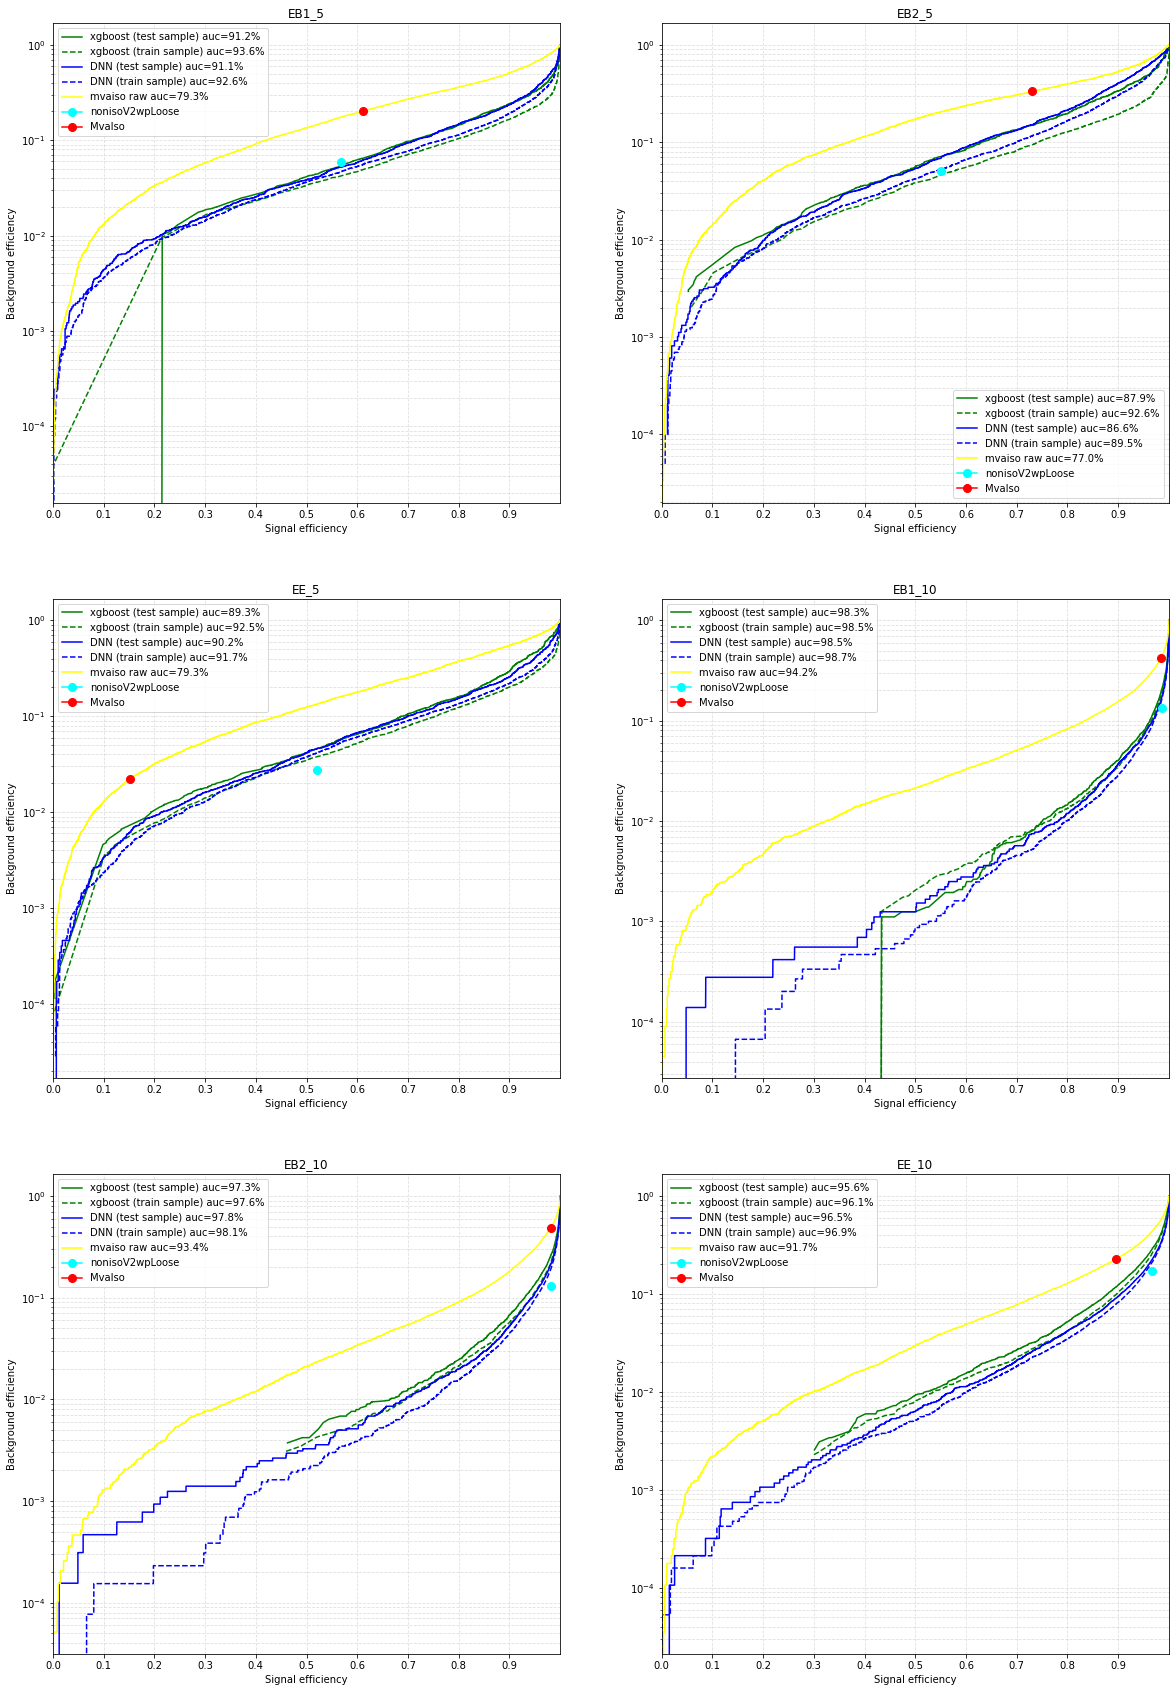

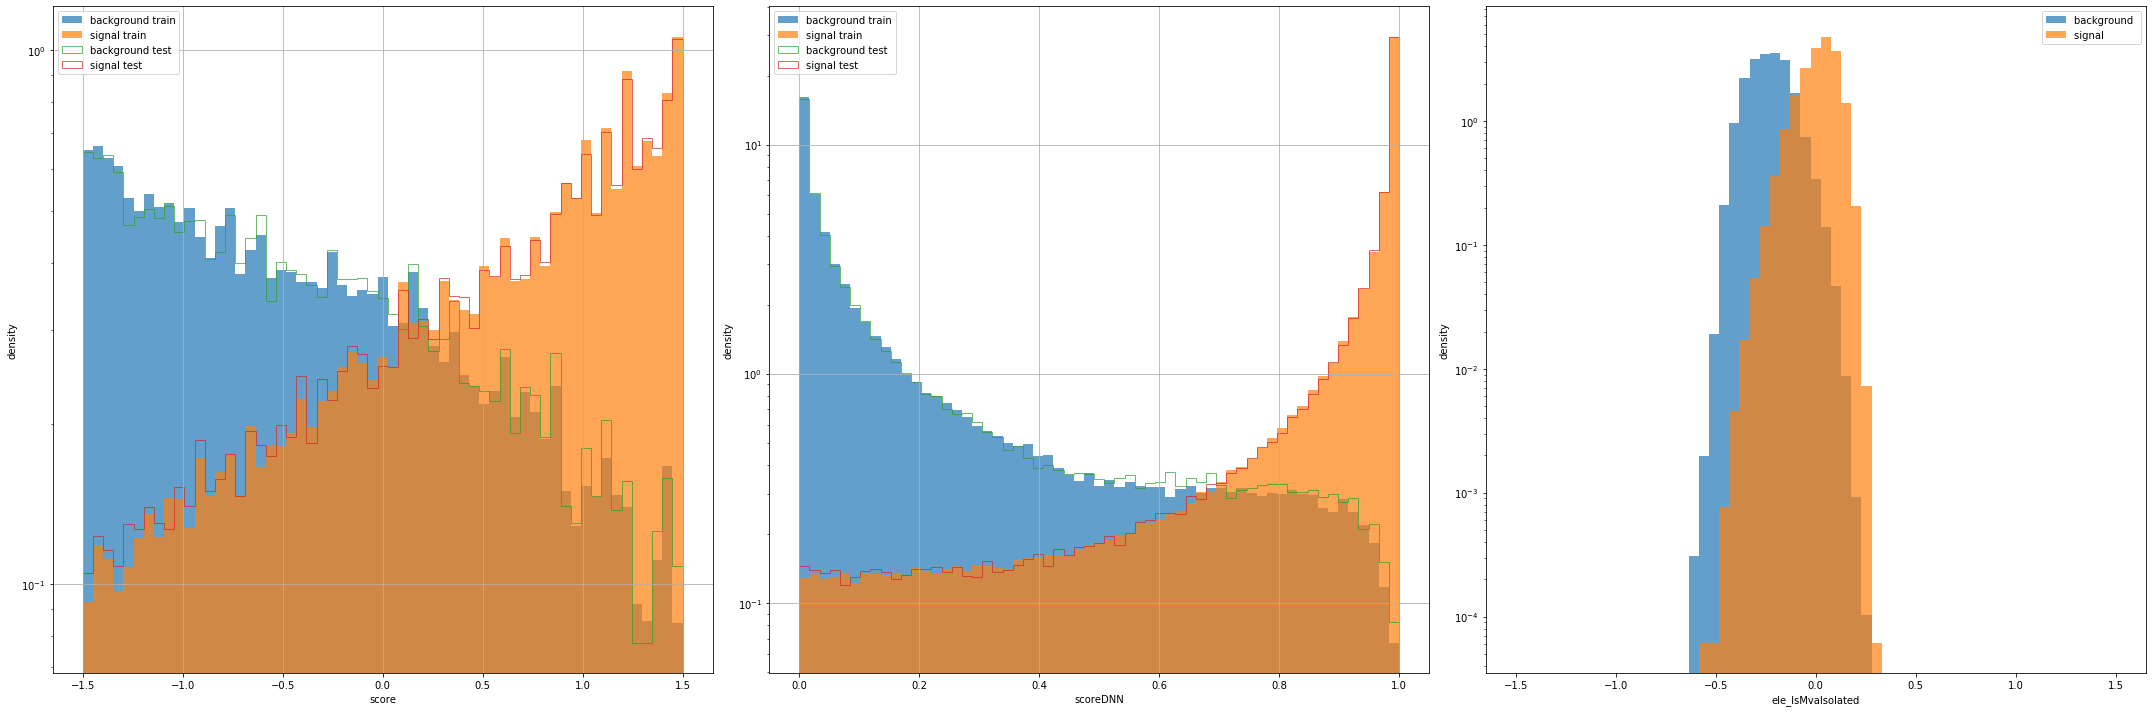

In [35]:


fig, axes = plt.subplots(3, 2, figsize=(20, 30))

for i, df_group in df.groupby("EleMVACats"):
    print(i)
    
    #if i !=5:
    #    continue
    #if i > 0:
        #continue
    
    df_train = df_group.query("not test")
    df_test = df_group.query("test")
    
    df.columns
    
    if i==0:
        ax = axes[0,0]
        val = -0.1875
    elif i==1:
        ax = axes[0,1]
        val = -0.1875
    elif i==2:
        ax = axes[1,0]
        val = -0.1075
    elif i==3:
        ax = axes[1,1]
        val = -0.1875
    elif i==4:
        ax = axes[2,0]
        val = -0.1875
    elif i==5:
        ax = axes[2,1]
        val = -0.1075
        
    
    ax.set_xlim(0, 1)
    #ax.set_ylim(0, 1.1)
    ax.xaxis.set_ticks(np.arange(0, 1, 0.1))
    #ax.yaxis.set_ticks(np.arange(0, 1.1, 0.1))
    ax.grid(True, which="both", ls="--", alpha=0.4)
    #ax.grid()
    
    auc_test=plot_roc_curve(df_test, "score", ax=ax,color="green", label="xgboost (test sample)")
    auc_train=plot_roc_curve(df_train, "score", ax=ax, color="green", linestyle='--', label="xgboost (train sample)")
    #plot_roc_curve(df_test, "ele_IsMvaNonIsolated", ax=ax)
    auc_testDNN=plot_roc_curve(df_test, "scoreDNN", ax=ax,color="blue", label="DNN (test sample)")
    auc_trainDNN=plot_roc_curve(df_train, "scoreDNN", ax=ax, color="blue", linestyle='--', label="DNN (train sample)")
    #auc_mvaiso=plot_roc_curve(df_group, "ele_IsMvaIsolated", color="yellow", ax=ax)
    auc_mvaiso=plot_roc_curve(df_group, "ele_IsMvaIsolated", color="yellow", ax=ax, label="mvaiso raw")
    #plot_single_roc_point(df_test, var='Fall17isoV1wpLoose', color="yellow", ax=ax)
    #plot_single_roc_point(df, var='Fall17isoV1wpLoose', ax=ax , marker='o', markersize=6, color="red",label='Fall17isoV1wpLoose')
    #plot_single_roc_point(df_group, var='Fall17isoV2wpLoose', ax=ax , marker='o', markersize=8, color="orange",label='isoV2wpLoose')
    plot_single_roc_point(df_group, var='Fall17noIsoV2wpLoose', ax=ax , marker='o', markersize=8, color="cyan",label='nonisoV2wpLoose')
    plot_single_roc_point2(df_group, var='ele_IsMvaIsolated', val=val, ax=ax , marker='o', markersize=8, color="red",label='MvaIso')
    
    
    print(category_titles[i])
    print(val)
    print(f'auc_test={auc_test}')
    print(f'auc_train={auc_train}')
    print(f'auc_testDNN={auc_testDNN}')
    print(f'auc_trainDNN={auc_trainDNN}')
    print(f'auc_mvaiso={auc_mvaiso}')
    #print(f'auc_mvanoniso={auc_mvanoniso}')
    
    ax.set_title(category_titles[i])
    ax.legend()
    ax.set_xlabel("Signal efficiency")
    ax.set_ylabel("Background efficiency")
    
fig.savefig('roc.pdf')  
plt.show()


def plot_mva(df, column, bins, logscale=False, ax=None, title=None, ls='dashed', alpha=0.5, sample=''):
    if sample is '' or sample is 'train':
        histtype="bar"
    if sample is 'test':
        histtype="step"
        
    if ax is None:
        ax = plt.gca()
    for name, group in df.groupby("matchedToGenEle"):
        group[column].hist(bins=bins, histtype=histtype, alpha=0.7,
                           label=get_label(name)+' '+sample, ax=ax, density=True, ls=ls)
    ax.set_ylabel("density")
    ax.set_xlabel(column)
    ax.legend()
    ax.set_title(title)
    #if logscale:
    ax.set_yscale("log", nonposy='clip')

fig, axes3 = plt.subplots(1, 3, figsize=(30, 10))

df_train = df.query("not test")
df_test = df.query("test")
plot_mva(df_train, "score", np.linspace(-1.5, 1.5, 60), ls='dotted', ax=axes3[0],sample='train')
plot_mva(df_test, "score", np.linspace(-1.5, 1.5, 60), ls='solid', ax=axes3[0], sample='test')

plot_mva(df_train, "scoreDNN", np.linspace(0, 1, 60), ls='dotted', ax=axes3[1],sample='train')
plot_mva(df_test, "scoreDNN", np.linspace(0, 1, 60), ls='solid', ax=axes3[1], sample='test')

plot_mva(df, "ele_IsMvaIsolated", np.linspace(-1.5, 1.5, 60), ls='solid', ax=axes3[2],sample='')
#plot_mva(df, "ele_IsMvaIsolated", np.linspace(-2, 2, 40), ls='solid', ax=axes3[1], sample='test')

#plot_electrons(df_train, "score", np.linspace(-10, 10, 100), ax=axes[0,1])

fig.tight_layout()
plt.grid()
plt.show()

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 30))

for i, df_group in df.groupby("EleMVACats"):
    print(i)
    #if i < 0:
     #   continue
    
    df_train = df_group.query("not test")
    df_test = df_group.query("test")
    
    df.columns
    
    if i==0:
        ax = axes[0,0]
        val = -0.1875
    elif i==1:
        ax = axes[0,1]
        val = -0.1875
    elif i==2:
        ax = axes[1,0]
        val = -0.1075
    elif i==3:
        ax = axes[1,1]
        val = -0.1875
    elif i==4:
        ax = axes[2,0]
        val = -0.1875
    elif i==5:
        ax = axes[2,1]
        val = -0.1075
    
    plot_single_roc_point(df_group, var='Fall17isoV2wpLoose', ax=ax , marker='o', markersize=6, color="orange",label='Fall17isoV2wpLoose')
    plot_single_roc_point2(df_group, var='ele_IsMvaIsolated', val=val, ax=ax , marker='o', markersize=8, color="red",label='MvaIso')
    auc_mvaiso=plot_roc_curve(df_group, "ele_IsMvaIsolated", color="yellow", ax=ax)
    auc_mvaiso=plot_roc_curve(df_train, "ele_IsMvaIsolated", color="blue", ax=ax,label='MvaIso_train')
    auc_mvaiso=plot_roc_curve(df_test, "ele_IsMvaIsolated", color="green", ax=ax,label='MvaIso_test')
    
    ax.set_title(category_titles[i])
    ax.legend()
    ax.set_xlabel("Signal efficiency")
    ax.set_ylabel("Background efficiency")
    
    print(category_titles[i])
    print(val)
    #print(f'auc_mvanoniso={auc_mvanoniso}')
fig.savefig('roc_mvaiso.pdf')  
plt.grid()
plt.show()


In [ ]:
fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5))

for i, df_group in df.groupby("EleMVACats"):
    
    if i < 3:
        continue
    
    df_train = df_group.query("not test")
    df_test = df_group.query("test")
    
    df.columns
    
    ax = axes2[i%3]
    #plot_roc_curve(df_test, "score", ax=ax,color="green", label="your new training (test sample)")
    #plot_roc_curve(df_train, "score", ax=ax, color="green", linestyle='--', label="your new training (train sample)")
    #plot_roc_curve(df_test, "ele_IsMvaNonIsolated", ax=ax)
    #plot_roc_curve(df_test, "ele_IsMvaIsolated", ax=ax)
    plot_roc_curve(df_test, "ele_pt", ax=ax)
    plot_roc_curve(df_test, "vtxN", ax=ax)
    plot_roc_curve(df_test, "ele_olde15", ax=ax)
    plot_roc_curve(df_test, "ele_eelepout", ax=ax)
    #plot_roc_curve(df_test, "ele_expected_inner_hits", ax=ax)
    plot_roc_curve(df_test, "ele_ep", ax=ax)
    plot_roc_curve(df_test, "ele_kfchi2", ax=ax)
    plot_roc_curve(df_test, "ele_fbrem", ax=ax)
    
    #features_barrel = ["ele_fbrem", "ele_deltaetain", "ele_deltaphiin", "ele_oldsigmaietaieta", 
     #              "ele_oldhe", "ele_ep", "ele_olde15", "ele_eelepout",
      #             "ele_kfchi2", "ele_kfhits", "ele_expected_inner_hits", "vtxN", "ele_convDist","ele_convDcot"]
    
    #plot_roc_curve(df_test, "Fall17IsoV2RawVals", ax=ax)
    
    ax.set_title(category_titles[i])
    ax.legend()
    ax.set_xlabel("Signal efficiency")
    ax.set_ylabel("Background efficiency")
plt.grid()   
plt.show()